# 引力场建模

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_vector_field(f, xmin, xmax, ymin, ymax, xstep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep))
    U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')
    fig = plt.gcf()
    fig.set_size_inches(7, 7)

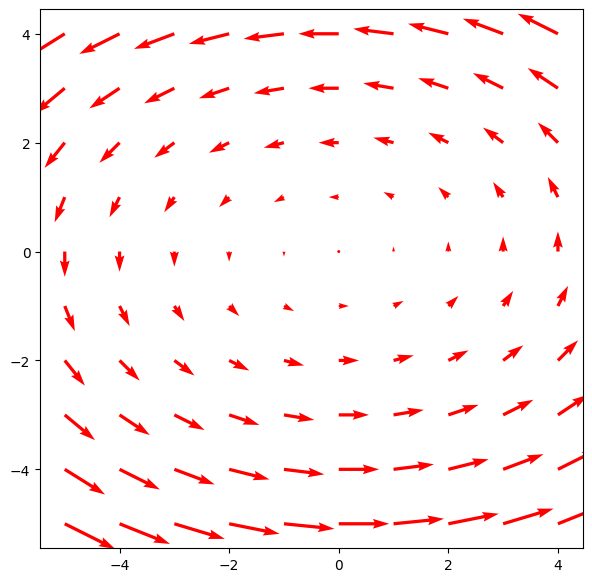

In [2]:
def f(x, y):
    return (-2 * y, x)


plot_vector_field(f, -5, 5, -5, 5)

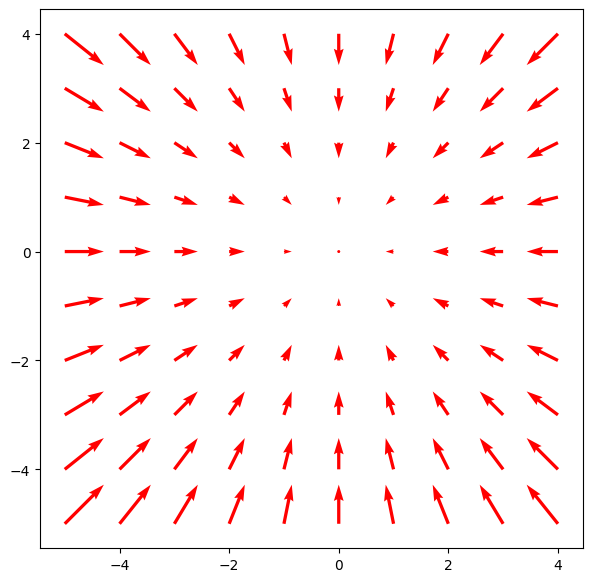

In [3]:
def black_hole_force(x, y):
    return -x, -y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

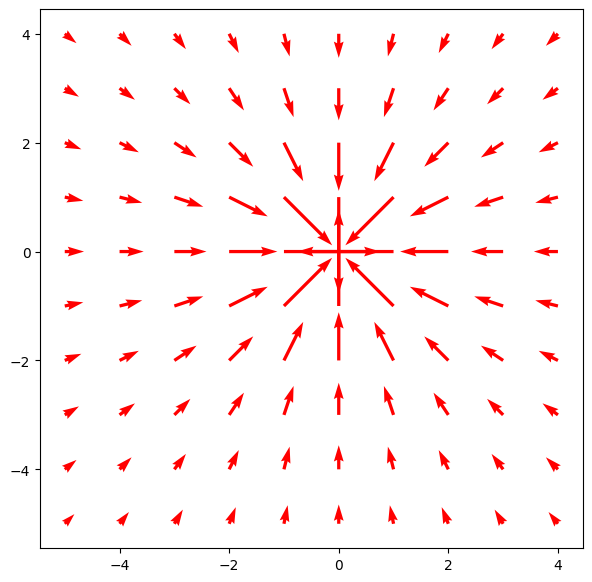

In [4]:
def black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0
    result_x = -x / (x ** 2 + y ** 2)
    result_y = -y / (x ** 2 + y ** 2)
    return result_x, result_y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

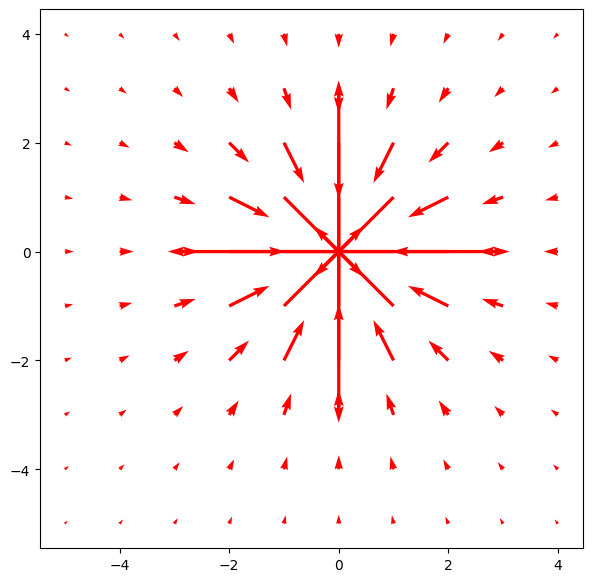

In [5]:
def improved_black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0

    distance = (x ** 2 + y ** 2) ** 0.5  # 计算欧几里得距离
    distance_cubed = distance ** 3  # 距离的立方

    # 根据实际引力公式 F = G*M*m/r^2，方向指向质量中心
    # 省略常数G、M和m，专注于随距离变化的部分
    force_magnitude = 1 / distance ** 2

    # 计算归一化的方向向量并乘以力的大小
    result_x = -x / distance * force_magnitude
    result_y = -y / distance * force_magnitude

    return result_x, result_y


plot_vector_field(improved_black_hole_force, -5, 5, -5, 5)

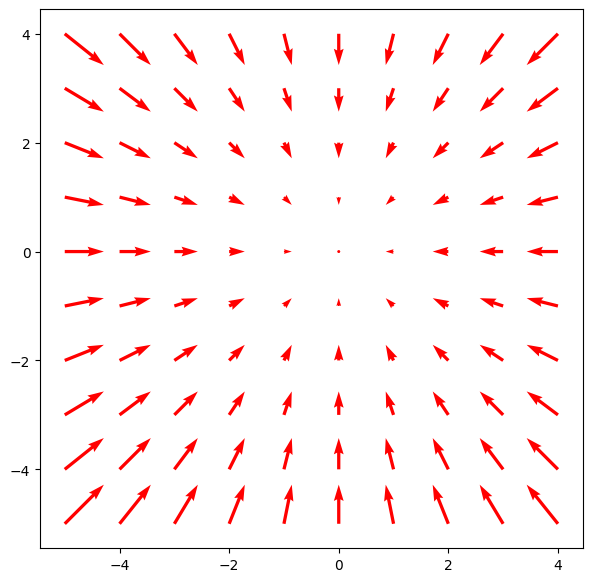

In [6]:
from py_lib import vectors


def gravitational_field(source, x, y):
    relative_position = (x - source.x, y - source.y)
    return vectors.scale(- source.gravity, relative_position)


class Plant:
    def __init__(self, x, y, gravity):
        self.x = x
        self.y = y
        self.gravity = gravity


def plant_gravitational_field(x, y):
    return gravitational_field(Plant(0, 0, 2), x, y)


plot_vector_field(plant_gravitational_field, -5, 5, -5, 5)

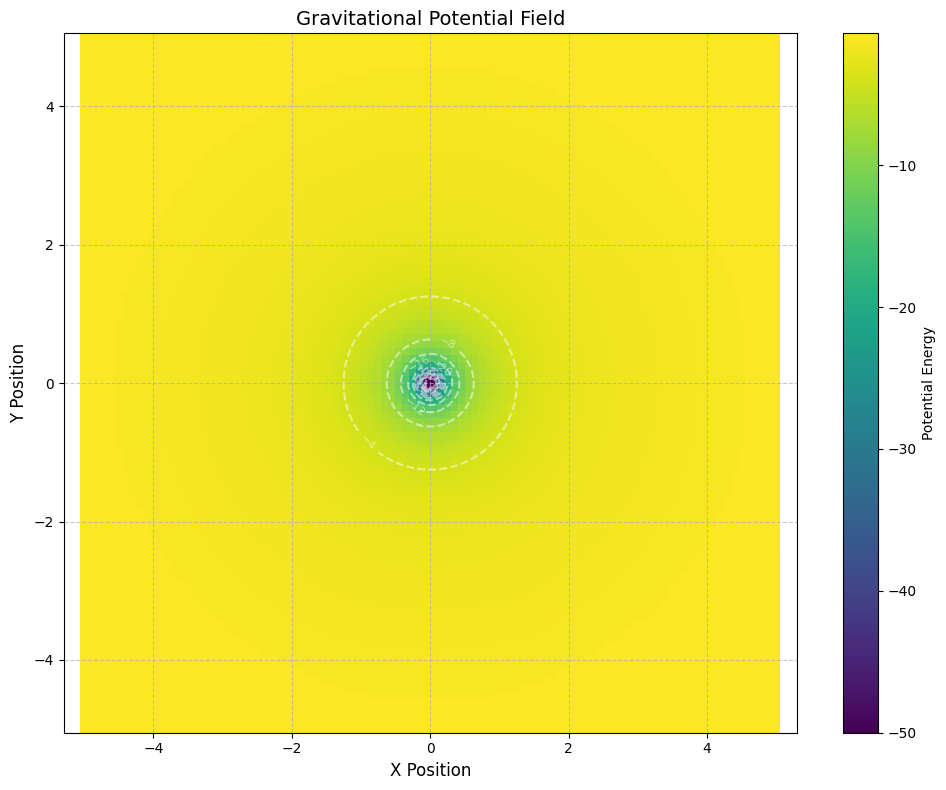

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建坐标网格 (Create coordinate grid)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 计算重力势能场 (Calculate gravitational potential field)
# 公式: U = -G * M / r，其中 r 是距离中心点的距离
# Formula: U = -G * M / r, where r is the distance from the center
G = 1  # 重力常数 (Gravitational constant)
M = 5  # 质量 (Mass)
R = np.sqrt(X**2 + Y**2)
# 避免除以零 (Avoid division by zero)
R[R < 0.1] = 0.1
# 计算势能 (Calculate potential)
U = -G * M / R

# 创建图形 (Create figure)
plt.figure(figsize=(10, 8))

# 绘制热力图 (Draw heatmap)
heatmap = plt.pcolormesh(X, Y, U, cmap=cm.viridis, shading='auto')
plt.colorbar(heatmap, label='Potential Energy')

# 添加等高线 (Add contour lines)
contours = plt.contour(X, Y, U, 15, colors='white', alpha=0.5)
plt.clabel(contours, inline=True, fontsize=8)

# 设置图表标题和标签 (Set chart title and labels)
plt.title('Gravitational Potential Field', fontsize=14)
plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)

# 设置坐标轴范围 (Set axis ranges)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# 添加网格 (Add grid)
plt.grid(True, linestyle='--', alpha=0.7)

# 保持坐标轴比例相等 (Keep axis ratio equal)
plt.axis('equal')

# 显示图表 (Show the chart)
plt.tight_layout()
plt.show()

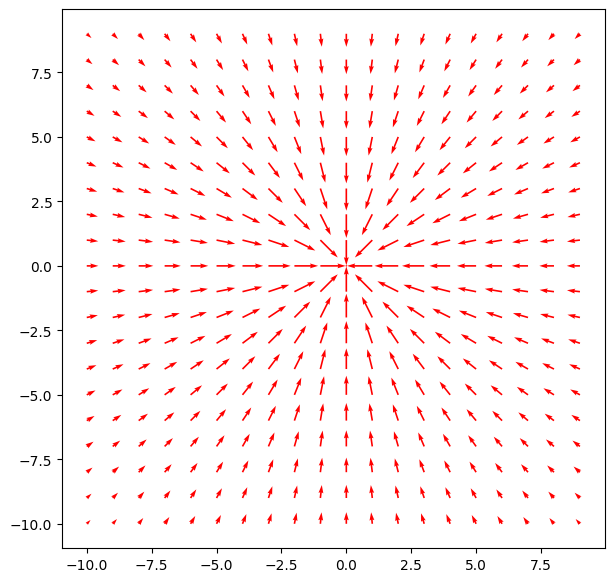

In [8]:
def calculate_gravity_vector(x, y, min_gravity=0.01, max_gravity=0.05):
    """
    计算指向中心点(0,0)的引力向量
    Calculate a gravity vector pointing towards the center point (0,0)

    参数/Parameters:
    x, y: 当前位置坐标 (current position coordinates)
    min_gravity: 最小引力大小 (minimum gravity magnitude)
    max_gravity: 最大引力大小 (maximum gravity magnitude)

    返回/Returns:
    gx, gy: 引力向量的x和y分量 (x and y components of gravity vector)
    """
    # 计算到中心点的距离 / Calculate distance to center
    distance = np.sqrt(x ** 2 + y ** 2)

    # 防止除以零 / Prevent division by zero
    if distance < 1e-10:
        return 0, 0

    # 归一化方向向量（指向中心） / Normalize direction vector (towards center)
    direction_x = -x / distance  # 负号表示指向中心 / Negative sign means towards center
    direction_y = -y / distance

    # 计算引力大小，距离越近引力越大 / Calculate gravity magnitude, closer = stronger
    # 将距离映射到 [0, 1] 范围 / Map distance to [0, 1] range
    max_possible_distance = np.sqrt(10 ** 2 + 10 ** 2)  # 约为14.14 / Approximately 14.14
    normalized_distance = 1 - (distance / max_possible_distance)

    # 线性插值计算引力大小 / Linear interpolation for gravity magnitude
    magnitude = min_gravity + normalized_distance * (max_gravity - min_gravity)

    # 计算引力向量分量 / Calculate gravity vector components
    gravity_x = direction_x * magnitude
    gravity_y = direction_y * magnitude

    return gravity_x, gravity_y

plot_vector_field(calculate_gravity_vector, -10, 10, -10, 10)